<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/MachineLearningforBeginners_Part_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - **Topics**

1. Introduction - ML, Types,SL,UL, Regression , Classification

What will be the approach to learn

Maths ?

Python ?

2. Weight , Bias , Feature(Slope, intercept, target and independent variable)

3. Linear Regression Problem - Supervised Learning Regression Problem

4. Error - Predicted Vs Tested Value

5. A little maths on derivative

7. Gradient Descent and Cost Function

8. Logistic Regression - Solving Supervised Learning Classification problem

9. Performance Evaluation




# Machine Learning - Introduction

# Features, Weights and Bias


Let's solve a basic maths problem:
suppose you go to supermarket one day and find the melons of different sizes and weights

melon_data = [(1, 2), (2, 4), (3, 6),(4, 8), (5, 10]

melon_price=2*melon_wt

let's say  you need to pay parking of the place as $2 weather you buy or not


melon_price=2*melon_wt+2

If I ask you the price of melon weighted 20 kg, you will substitute in equation:

melon_price_20=2*20+2

We can also draw a graph with and without tax .We can predict value from the line.








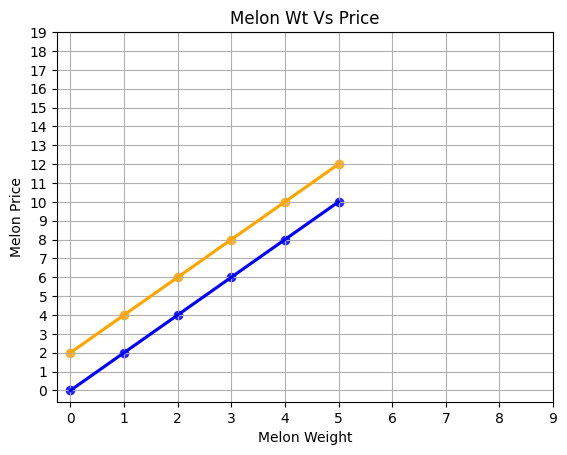

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample list of tuples containing coordinates
coordinates1 = [(0,0),(1, 2), (2, 4), (3, 6), (4, 8), (5, 10)]
#with bias
coordinates2 = [(0,2),(1, 4), (2, 6), (3, 8), (4, 10), (5, 12)]


# Extract x and y coordinates from the list of tuples
x_values_1 = [coord[0] for coord in coordinates1]
y_values_1 = [coord[1] for coord in coordinates1]

# Extract x and y coordinates from the list of tuples
x_values_2 = [coord[0] for coord in coordinates2]
y_values_2 = [coord[1] for coord in coordinates2]

# Plot the points
sns.regplot(x=x_values_1,y= y_values_1,color='blue')

# Plot the points
sns.regplot(x=x_values_2,y= y_values_2,color='orange')


# Add labels and title
# Customize x-ticks to display integers
plt.xticks(range(min(x_values_1), max(x_values_1)+5))
plt.yticks(range(min(y_values_1), max(y_values_1)+10))

# Add labels and title
plt.xlabel('Melon Weight')
plt.ylabel('Melon Price')
plt.title('Melon Wt Vs Price')
# Show the plot
plt.grid(True)
plt.show()

#annotate line with eqaution while describing

[Inspiration: Towards Data Science](https://towardsdatascience.com/machine-learning-simple-linear-regression-with-python-f04ecfdadc13)

Linear equation in general be written as

y=mx+b

m-> slope or weight

b-> bias

x, y are variables are

when we are using it for machine learning, y is dependent variable(dependent on x in this case like melon price is dependendent on melon weight) or predicted variable or label or target variable or the variable
x is independent variable or feature


This can also be interpretedvas simple linear regression model where we can predic value of with help of value of x



**When life is not that straightforward**

Suppose we want to predict the salary of an employee based on their years of experience. In this case, the independent variable is “years of experience” and the dependent variable is “salary”. We have a dataset that contains the salaries of 35 employees along with their years of experience.

Now you are a hiring manager and you have a candidate 7.7 years of experience, what salary you could offer based on dataset provided

 Our task is to build a model that can predict the salary of a new employee based on their years of experience.



[Salary Data Set](https://www.kaggle.com/code/codebreaker619/employee-salary-prediction-using-linear-regression/input)






In [51]:
import pandas as pd

# Convert dictionary to DataFrame
df = pd.read_csv("Salary.csv")

# Display the DataFrame
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


Based on our observation, we can guess that the salary range of 5 Years Experience should be in the particular range. Of course, we can offer to our candidate any number in that red range. But how to pick the best number for him? It’s time to use Machine Learning to predict the best salary for our candidate.

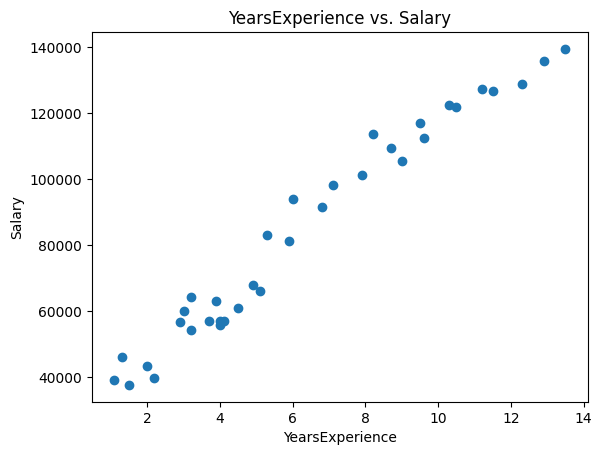

In [53]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(df["YearsExperience"], df["Salary"])

#set labels
plt.title('YearsExperience vs. Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

# Set y-axis tick formatter to disable scientific notation
plt.ticklabel_format(style='plain', axis='y')

#show plot
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df.iloc[:, :-1].values #get a copy of dataset exclude last column
y = df.iloc[:, 1].values #get array of dataset in column 1st
#input features need to be in 2-D shappe
X.shape




(35, 1)

In [72]:
#training the model
model.fit(X, y)


LinearRegression()

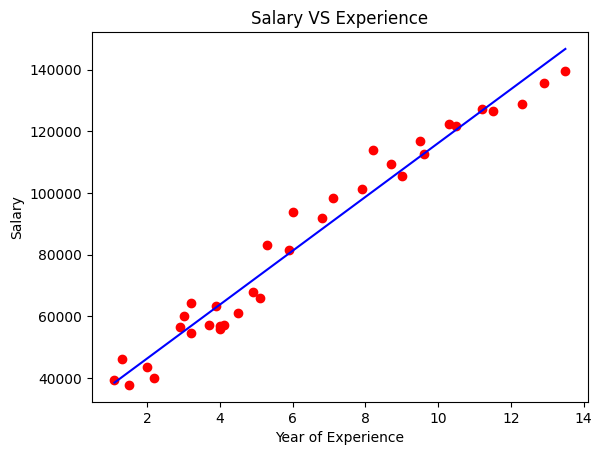

In [74]:
# Visualizing the Training set results

plt.scatter(X, y, color='red')
plt.plot(X, model.predict(X), color='blue')
plt.title('Salary VS Experience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [75]:
# Extract the coefficients
m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

print("Slope (m):", m)
print("Intercept (b):", b)

Slope (m): 8731.941047062497
Intercept (b): 28859.52619453144


In [78]:
import numpy as np
X_pred = np.array([[7.7]])

# Make predictions
prediction = model.predict(X_pred)
prediction
#check value by replacing y=mx+b using above slope and intercept

array([96095.47225691])